In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ool_pds = pd.read_csv('ool_pds.csv')
ool_pds.head()

,CASEID,W1_CASEID,W2_CASEID2,W1_TM_START,W1_TM_FINISH,W1_WEIGHT1,W1_WEIGHT2,W1_WEIGHT3,W2_TM_START,W2_TM_FINISH,...,PPREG9,PPRENT,PPSTATEN,PPT01,PPT1317,PPT18OV,PPT25,PPT612,PPWORK,PPNET
0,1,2,820,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,4.8559,2.4181,2.3315,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,3,1,32,0,0,2,0,0,3,1
1,2,3,,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,0.0415,0.2091,0.1954,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,9,2,93,0,0,2,0,0,6,1
2,3,4,1198,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,0.7628,3.8416,3.5907,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,7,1,74,0,0,2,2,0,1,1
3,4,5,240,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,0.0089,0.0448,0.0418,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,9,2,91,0,0,1,0,0,5,1
4,5,6,,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,1.9532,0.9727,0.9378,BLANKED FOR CONFIDENTIALITY - ICPSR,BLANKED FOR CONFIDENTIALITY - ICPSR,...,3,1,32,0,0,3,0,0,1,1


In [11]:
df = ool_pds[["PPINCIMP","W1_A1"]]
df["PPINCIMP"] = pd.to_numeric(df["PPINCIMP"], errors = "coerce")

/home/melisan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
def centering(x):
    return x - 9
df['PPINCIMP'] = df['PPINCIMP'].apply(centering)

/home/melisan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


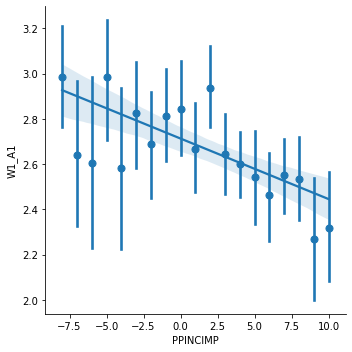

In [9]:
sns.lmplot(x="PPINCIMP", y="W1_A1", data=df, x_estimator=np.mean)

In [8]:
results = ols('W1_A1 ~ PPINCIMP', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  W1_A1   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     27.48
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           1.73e-07
Time:                        10:08:23   Log-Likelihood:                -3685.2
No. Observations:                2294   AIC:                             7374.
Df Residuals:                    2292   BIC:                             7386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7129      0.027    100.953      0.000       2.660       2.766
PPINCIMP      -0.0267      0.005     -5.242      0.000      -0.037      -0.017
==============================================================================
Omnibus:                       19.046   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.512
Skew:                           0.125   Prob(JB):                     0.000428
Kurtosis:                       2.685   Cond. No.                         5.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""